In [ ]:
# Don B.
# Doctor Ofori
# DSC 510
# 23 September 2023

In [ ]:
# Many real-world datasets exhibit outliers or extreme values. Discuss the potential impact of outliers on measures of central 
# tendency and variability, and propose at least two methods for identifying and handling outliers in data analysis. 
# How can Python be used to implement these methods? Provide examples from real-world datasets to illustrate your points?

In [ ]:
# Impact of Outliers on Measures of Central Tendency and Variability:
# Mean: Averages are highly sensitive to outliers. Even one extremely large or small outlier can skew the mean significantly, 
# in turn, making the mean not representative of the central location of the majority of the data.

# Median: The median is more resillient against outliers. For datasets with extreme values, 
# the median is often times a better measure of central tendency.

# Mode: The mode is unaffected by outliers unless the outliers occur more frequently than every other value.
    
# Standard Deviation (SD) & Variance: Variance and standard deviation, measure the spread of data. 
# Outliers may heavily influence these metrics, making the data appear more spread out than it actually is.

# Range:
# Max Outlier: Increases range by raising the max value.
# Min Outlier: Increases range by lowering the min value.
# Max & Min Outliers: Most exaggerated range.
# Within-Range: No effect on range.

In [ ]:
# NOTE:
# The Interquartile Range (IQR) represents the range between the first quartile (25th percentile) 
# and the third quartile (75th percentile) of a dataset. It captures the spread of the central 50% of values. 
# To handle outliers using the IQR, you can identify values that fall below Q1 - 1.5 x IQR as lower outliers 
# or above Q3 + 1.5 x IQR as upper outliers. Once identified, outliers can either be removed or adjusted 
# accordingly.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df1 = pd.read_csv("downloads/NHANES_Weight_Height.csv")
#print(df1.head())
print(df1.columns)

Index(['Unnamed: 0', 'Weight (kg)', 'Standing Height (cm)', 'BMI(kg/m**2)'], dtype='object')


In [25]:
# Methods for Identifying and Handling Outliers (Example 1): Interquartile Range (IQR)
# Mean, Median, Mode, Standard Deviation, Range, and IQR for each column
columns_to_analyze = ['Weight (kg)', 'Standing Height (cm)', 'BMI(kg/m**2)']

for column in columns_to_analyze:
    mean_val = df1[column].mean()
    median_val = df1[column].median()
    mode_val = df1[column].mode()[0] 
    std_val = df1[column].std()
    range_val = df1[column].max() - df1[column].min()

    # Calculating IQR and IQR-based bounds
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Statistics for {column}:")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode: {mode_val:.2f}")
    print(f"Standard Deviation: {std_val:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"IQR-based Range for Outliers: <{lower_bound:.2f} or >{upper_bound:.2f}")
    print("-----------------------------")

Statistics for Weight (kg):
Mean: 83.67
Median: 79.90
Mode: 75.80
Standard Deviation: 23.17
Range: 221.70
IQR: 28.20
IQR-based Range for Outliers: <25.30 or >138.10
-----------------------------
Statistics for Standing Height (cm):
Mean: 166.64
Median: 166.20
Mode: 164.60
Standard Deviation: 10.08
Range: 68.50
IQR: 14.80
IQR-based Range for Outliers: <136.90 or >196.10
-----------------------------
Statistics for BMI(kg/m**2):
Mean: 30.03
Median: 28.80
Mode: 29.10
Standard Deviation: 7.57
Range: 78.10
IQR: 8.90
IQR-based Range for Outliers: <11.55 or >47.15
-----------------------------


In [26]:
# Methods for Identifying and Handling Outliers (Example 1): Interquartile Range (IQR)

def find_outliers_iqr(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column_name] < lower_bound) | 
                         (dataframe[column_name] > upper_bound)]
    return outliers

# Identifying outliers for each column
outliers_weight = find_outliers_iqr(df1, 'Weight (kg)')
outliers_height = find_outliers_iqr(df1, 'Standing Height (cm)')
outliers_bmi = find_outliers_iqr(df1, 'BMI(kg/m**2)')

In [28]:
# Printing the outliers
# print("Outliers for Weight (kg):")
# print(outliers_weight)


Outliers for Standing Height (cm):
      Unnamed: 0  Weight (kg)  Standing Height (cm)  BMI(kg/m**2)
60            60        106.8                 198.7          27.1
1906        1906         53.8                 135.3          29.4
1917        1917        129.6                 196.6          33.5
2165        2165         60.3                 131.1          35.1
3379        3379         97.5                 197.7          24.9
4026        4026         93.6                 198.4          23.8
5815        5815        109.1                 198.3          27.7
7576        7576        117.4                 199.6          29.5


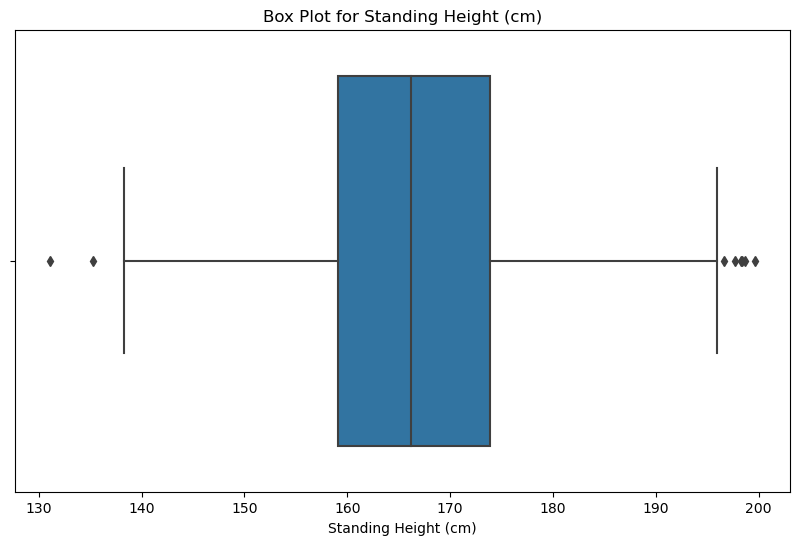

In [35]:
print("\nOutliers for Standing Height (cm):")
print(outliers_height)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Standing Height (cm)'])
plt.title('Box Plot for Standing Height (cm)')
plt.show()

In [29]:
# print("\nOutliers for BMI(kg/m**2):")
# print(outliers_bmi)

In [ ]:
# Z-score Method:
# What is a Z - Score?
# The Z-score represents the number of standard deviations a data point is from the mean. 
# It's a measure of how unusual or typical a point is with respect to the mean and standard deviation of a set of data.

# Impact of outliers on Z-scores:
# Data points with extremely high or low Z-scores can be considered as outliers. 
# These data points can significantly impact measures of central tendency and variability.

# Identifying and handling outliers using Z-scores:
# Outliers can be identified using a Z-score threshold. 
# A common threshold found on the internet is a Z-score of ± 2.5 or ± 3, but can vary.

In [30]:
#from scipy import stats
#import numpy as np

def find_outliers_zscore(dataframe, column_name, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe[column_name]))
    outliers = dataframe[z_scores > threshold]
    return outliers

# Identifying outliers for 'Standing Height (cm)' using Z-score method
outliers_height_zscore = find_outliers_zscore(df1, 'Standing Height (cm)', threshold = 3)

In [31]:
print(outliers_height_zscore)

      Unnamed: 0  Weight (kg)  Standing Height (cm)  BMI(kg/m**2)
60            60        106.8                 198.7          27.1
1906        1906         53.8                 135.3          29.4
2165        2165         60.3                 131.1          35.1
3379        3379         97.5                 197.7          24.9
4026        4026         93.6                 198.4          23.8
5815        5815        109.1                 198.3          27.7
7576        7576        117.4                 199.6          29.5


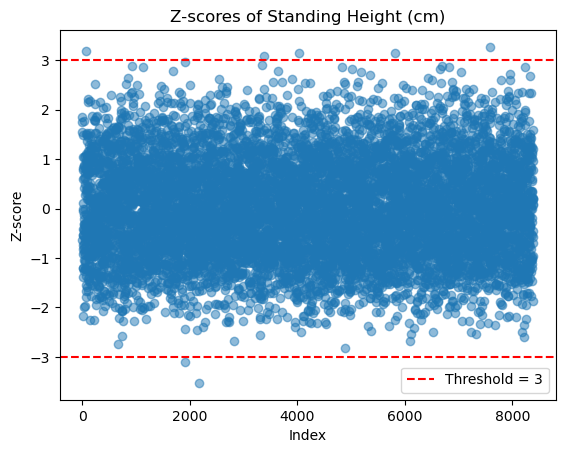

In [34]:
z_scores = stats.zscore(df1['Standing Height (cm)'])
plt.scatter(range(len(z_scores)), z_scores, alpha=0.5)
plt.axhline(y=3, color='r', linestyle='--', label="Threshold = 3")
plt.axhline(y=-3, color='r', linestyle='--')
plt.title('Z-scores of Standing Height (cm)')
plt.ylabel('Z-score')
plt.xlabel('Index')
plt.legend()
plt.show()

In [ ]:
# Weight and Height from NHANES Dataset pulled from kaggle

#This dataset is taken from a large National Health and Nutrition Survey conducted by the National Center for Health Statistics. 
#From the original Body Measures Set (P_BMX) we selected only adult observations: Height (BMXHT), Weight (BMXWT) and Index body weights (BMXBMI). 
#To select only adults, the BMDBMIC trait was used, which was determined only for children from 2 to 19 years old.

#Columns contain data for males and females 20 years - 150 years
#Weight (kg) 
#Standing Height (cm) 
#BMI(kg/m**2) 

# https://www.kaggle.com/datasets/galserge/weight-and-height-from-nhanes

In [ ]:
# Reference: 
#Costa, E., & Papatsouma, I. (2023). Outlier detection for mixed-type data: A novel approach.

False
